### Dataviz

In [1]:
import numpy as np
import pandas as pd
import sys
import json
import glob
import matplotlib.pyplot as plt
import os

In [2]:
# fonction qui permet de récupérer tout les json et de les mettres dans une liste
# folder : le chemin d'accès au json
def load_datas(folder):
    annotations = []
    if not os.path.exists(os.path.abspath(folder)):
        print("le repertoire "+os.path.abspath(folder)+" n'existe pas")
    list_file = glob.glob("{}*.json".format(folder))
    for file in list_file:
        with open(file, encoding="utf-8") as f:
            json_obj = json.loads(" ".join(f))
            annotations.append(json_obj)
    return annotations

In [3]:
#  fonction qui permet de transformer la liste de dictionnaire en dataframe
# annotations : la liste de json retournée par la fonction load_datas(folder)
def dict_to_df(annotations):
    asset = []
    for annotation in annotations:
        asset.extend([annotation["asset"]] * len(annotation["regions"]))
    df_asset = pd.DataFrame(asset)
    df_asset = df_asset.add_prefix('asset_')
    df_asset = df_asset.drop(columns='asset_size')
    size = []
    for annotation in annotations:
        size.extend([annotation["asset"]["size"]] * len(annotation["regions"]))       
    df_asset_size = pd.DataFrame(size)
    df_asset_size = df_asset_size.add_prefix('asset_size_')
    df_regions = pd.DataFrame([region for i in range(len(annotations)) for region in annotations[i]["regions"]])
    df_regions = df_regions.add_prefix('regions_')
    df_regions = df_regions.drop(columns='regions_boundingBox')
    df_regions_boundingBox = pd.DataFrame([region["boundingBox"] for annotation in annotations for region in annotation["regions"]])
    df_regions_boundingBox = df_regions_boundingBox.add_prefix('regions_boundingBox_')
    df = pd.concat([df_asset, df_asset_size, df_regions_boundingBox, df_regions], axis=1)
    df.regions_tags = [elem for elt in df.regions_tags for elem in elt]
    df['points_count'] = [(len(counter)) for counter in df.regions_points]
    return df

In [4]:
output_path = 'echantillon_output/' 

In [5]:
annotations = load_datas(output_path)
len(annotations)

60

In [6]:
df = dict_to_df(annotations)
df.head()

,asset_format,asset_id,asset_name,asset_path,asset_state,asset_type,asset_size_height,asset_size_width,regions_boundingBox_height,regions_boundingBox_left,regions_boundingBox_top,regions_boundingBox_width,regions_id,regions_points,regions_tags,regions_type,points_count
0,jpg,054c701d53ae957c713b0035cf72cbc2,20190628_183115.jpg,https://surftestvott.blob.core.windows.net/inp...,2,1,4608,3456,99.096774,1828.032787,3319.741935,141.639344,tSG7ziOnm,"[{'x': 1863.4426229508197, 'y': 3319.741935483...",other,POLYGON,4
1,jpg,054c701d53ae957c713b0035cf72cbc2,20190628_183115.jpg,https://surftestvott.blob.core.windows.net/inp...,2,1,4608,3456,162.801843,1410.196721,3935.557604,120.393443,-mcZK2BYV,"[{'x': 1530.5901639344263, 'y': 3935.557603686...",other,POLYGON,4
2,jpg,054c701d53ae957c713b0035cf72cbc2,20190628_183115.jpg,https://surftestvott.blob.core.windows.net/inp...,2,1,4608,3456,205.271889,1813.868852,4254.082949,233.704918,rkGnrdLSC,"[{'x': 2019.2459016393443, 'y': 4254.082949308...",other,POLYGON,6
3,jpg,059250a637564bda617bc910dc58662f,GOPRO27.jpg,https://surftestvott.blob.core.windows.net/inp...,2,1,601,535,145.208054,195.867717,75.293065,92.079146,EHZ7iwHPp,"[{'x': 219.39158684045228, 'y': 90.08277404921...",fragment,POLYGON,21
4,jpg,059c8e7c4c954fdb6cb795182e06bdc5,IMG_20190623_142911.jpg,https://surftestvott.blob.core.windows.net/inp...,2,1,4000,3000,161.290323,83.333333,2236.559140,295.698925,fAcwMAL3t,"[{'x': 83.33333333333333, 'y': 2279.5698924731...",other,POLYGON,6


In [7]:
len(df)

116

In [8]:
df.regions_tags.unique()

array(['other', 'fragment', 'drinking_bottle'], dtype=object)

In [9]:
# nombre de bounding box max par image
df["asset_name"].value_counts()[:20].sort_values(ascending = False)

IMG_4334.JPG               5
DSC08759.JPG               4
IMG_4223.JPG               4
IMG_4246.JPG               4
IMG_4186.JPG               4
IMG_4258.JPG               4
20190623_142924.jpg        3
IMG_4375.JPG               3
IMG_20190623_142911.jpg    3
IMG_4232.JPG               3
IMG_4286.JPG               3
20190623_142934.jpg        3
20190623_142936.jpg        3
IMG_4295.JPG               3
IMG_4262.JPG               3
20190628_183115.jpg        3
IMG_20190507_122926.jpg    3
IMG_4321.JPG               2
IMG_4216.JPG               2
IMG_4340.JPG               2
Name: asset_name, dtype: int64

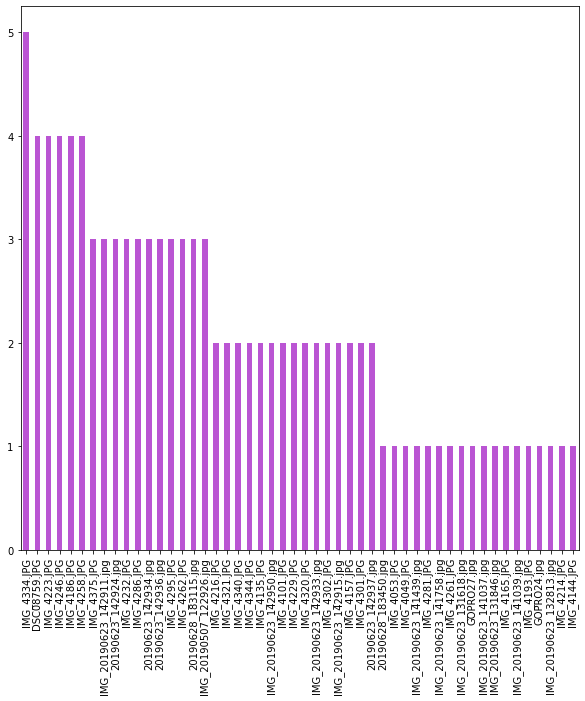

In [10]:
# plot nombres de bounding box par images
df["asset_name"].value_counts()[:50].plot(figsize=(10,10), color = 'mediumorchid', kind='bar')

In [11]:
# aplatir nombre d'images pour ne pas avoir la même image qui compterat plusieurs fois
img_size = df.groupby(["asset_name", "asset_size_height", "asset_size_width"], as_index = False).count()
img_size.head()

,asset_name,asset_size_height,asset_size_width,asset_format,asset_id,asset_path,asset_state,asset_type,regions_boundingBox_height,regions_boundingBox_left,regions_boundingBox_top,regions_boundingBox_width,regions_id,regions_points,regions_tags,regions_type,points_count
0,20190618_123659.jpg,3024,3024,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,20190623_142924.jpg,4608,3456,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2,20190623_142934.jpg,4608,3456,3,3,3,3,3,3,3,3,3,3,3,3,3,3
3,20190623_142936.jpg,4608,3456,3,3,3,3,3,3,3,3,3,3,3,3,3,3
4,20190623_142937.jpg,4608,3456,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [12]:
type(img_size)

pandas.core.frame.DataFrame

In [13]:
# s'assurer que les nombre d'images a bien été aplati
len(img_size["asset_name"])

60

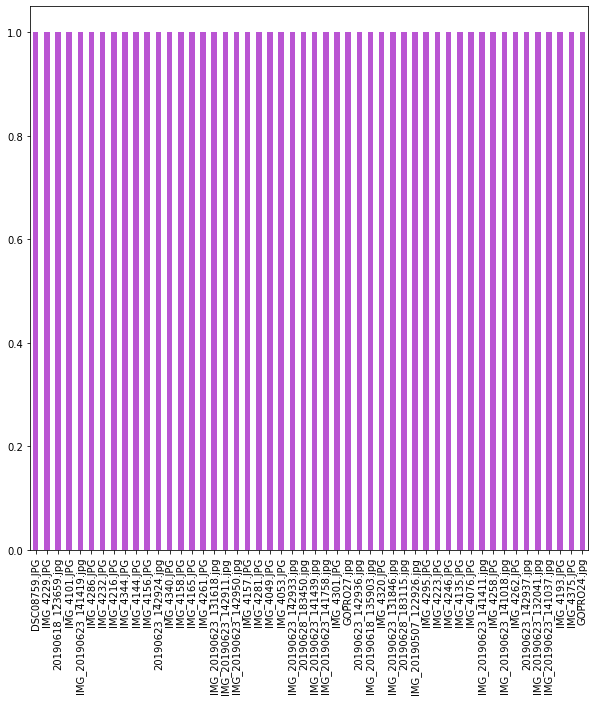

In [14]:
# plot nombres de bounding box par images (avec aplatissement une par/image )
img_size["asset_name"].value_counts()[:50].plot(figsize=(10,10), color = 'mediumorchid', kind='bar')

In [15]:
len(img_size["asset_size_height"])

60

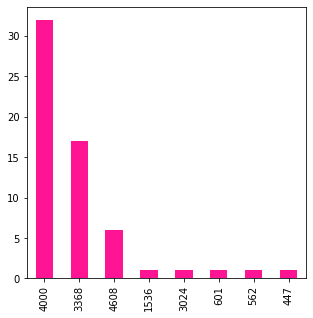

In [16]:
# comptabiliser les height les plus récurrentes
height_max = img_size["asset_size_height"].value_counts()[:20].sort_values(ascending = False).plot(figsize=(5,5), color = 'deeppink', kind='bar')

In [17]:
len(df["asset_size_width"])

116

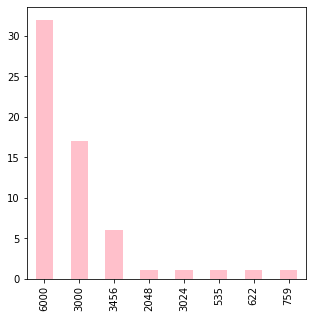

In [18]:
# comptabiliser les width les plus récurrentes
width_max = img_size["asset_size_width"].value_counts()[:20].sort_values(ascending = False).plot(figsize=(5,5), color = 'pink', kind='bar')

In [19]:
# petit dataframe uniquement avec les sizes
img_max = img_size[["asset_size_height", "asset_size_width"]]
img_max.head()

,asset_size_height,asset_size_width
0,3024,3024
1,4608,3456
2,4608,3456
3,4608,3456
4,4608,3456


In [20]:
img_max.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 2 columns):
asset_size_height    60 non-null int64
asset_size_width     60 non-null int64
dtypes: int64(2)
memory usage: 1.4 KB


In [21]:
# height max
max(img_max["asset_size_height"])

4608

In [22]:
# width max
max(img_max["asset_size_width"])

6000

In [23]:
# voir s'il existe une image avec ces deux max (résultat non)
img = img_max[(img_max["asset_size_height"]== 4608) & (img_max["asset_size_width"]== 6000)]
img

,asset_size_height,asset_size_width


In [24]:
# comptabilisation des tailles les plus récurrentes
tot_img_size = img_max.groupby(['asset_size_width','asset_size_height']).size().reset_index(name="count")
tot_img_size.sort_values("count", ascending=False) 

,asset_size_width,asset_size_height,count
4,3000,4000,17
7,6000,3368,17
8,6000,4000,15
6,3456,4608,6
0,535,601,1
1,622,447,1
2,759,562,1
3,2048,1536,1
5,3024,3024,1


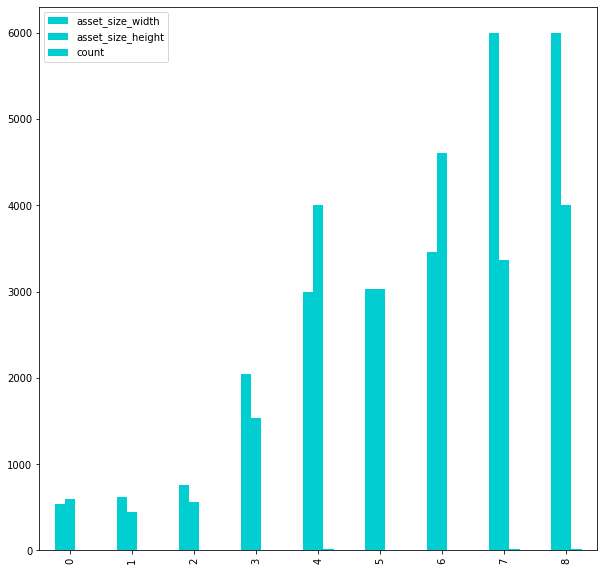

In [25]:
tot_img_size.plot(figsize=(10,10), color = 'darkturquoise', kind='bar')

In [26]:
# masque pour valeurs supérieures à 15
cat_15_or_more = tot_img_size[(tot_img_size["count"]>= 15)]
cat_15_or_more

,asset_size_width,asset_size_height,count
4,3000,4000,17
7,6000,3368,17
8,6000,4000,15


In [27]:
# une seule categorie pour les chiffres inferieurs ou = à 2
cat_2_or_less = tot_img_size[(tot_img_size["count"]<= 2)]
cat_2_or_less.head()

,asset_size_width,asset_size_height,count
0,535,601,1
1,622,447,1
2,759,562,1
3,2048,1536,1
5,3024,3024,1


In [28]:
# faire une ligne (somme) avec toutes ces valeurs
cat_2_or_less = cat_2_or_less.sum()
cat_2_or_less

asset_size_width     6988
asset_size_height    6170
count                   5
dtype: int64

In [29]:
# rajouter une ligne pour les chiffres <= 2 à cat_15_or_more


In [30]:
# nouveau dataframe avec les valeurs pour plot 
cat_pie_chart = cat_15_or_more 
cat_pie_chart

,asset_size_width,asset_size_height,count
4,3000,4000,17
7,6000,3368,17
8,6000,4000,15


In [31]:
# rajouter une colonne size avec str des deux dimensions pour legendes width * height
colonne_size = (str(cat_pie_chart["asset_size_width"]) + str(cat_pie_chart["asset_size_height"]))
colonne_size

'4    3000\n7    6000\n8    6000\nName: asset_size_width, dtype: int644    4000\n7    3368\n8    4000\nName: asset_size_height, dtype: int64'

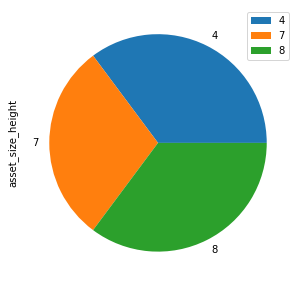

In [32]:
cat_pie_chart.plot.pie("asset_size_height",figsize=(5, 5))
plt.show()

In [33]:
# comptabiliser le nombre de bouteilles & unknown
nb_bouteilles = df.regions_tags[(df.regions_tags == 'drinking_bottle')]
nb_bouteilles
len(nb_bouteilles)

27

In [34]:
# comptabiliser le nombre de bouteilles & unknown
nb_unknow = df.regions_tags[(df.regions_tags == 'other')]
nb_unknow 
len(nb_unknow)

43